In [1]:
import numpy as np
import pandas as pd 
import requests

In [2]:
response = requests.get("https://indicadores.integrasus.saude.ce.gov.br/api/casos-coronavirus?dataInicio=2020-01-01&dataFim=2020-06-15")
json = response.json()

In [3]:
if response.status_code == 200:
    cases_covid = pd.DataFrame(json)

In [4]:
cases_covid

codigoPaciente estadoPaciente  \
0       0f72b910c5722625fc8ba5075f1417bb             CE   
1       974d1c1e6555e49df790e2ebf06b7fdc             CE   
2       1db75bc3226facaa4d2496c6420acbac             CE   
3       121c0ef19a2a52f71d44c2c0a57c3e50       AMAZONAS   
4       9ece71e1f67a7898f1b5f7cf65ab7e15             CE   
...                                  ...            ...   
234891  7519c5f25c3b4f6ca4843dab8064221a             CE   
234892  883b463ec6bdd171a4c08ed6f2b108e4             CE   
234893  43d0aa43f8e7efdfaea010eae92911f4             CE   
234894  ea5a3dacdea9af25dc55cb4b310257fe             CE   
234895  31b70beeaf3e6951276392ca9b4ee4bd             CE   

       codigoMunicipioPaciente municipioPaciente    bairroPaciente  \
0                       230930       NOVA RUSSAS         PROGRESSO   
1                       230440         FORTALEZA          MONDUBIM   
2                       231350            TRAIRI      RUA DA PALHA   
3                          NaN            MANAUS       CIDADE NOVA   
4                       230075          AMONTADA            MOITAS   
...                        ...               ...               ...   
234891                  230440         FORTALEZA  PRAIA DE IRACEMA   
234892                  230440         FORTALEZA           PASSARE   
234893                  230440         FORTALEZA           VARJOTA   
234894                  230340         CARNAUBAL    NOVO HORIZONTE   
234895                  230440         FORTALEZA   JOSE DE ALENCAR   

       sexoPaciente idadePaciente               dataNotificacao  \
0         MASCULINO            34  2020-06-03T03:00:00.000+0000   
1          FEMININO            47  2020-06-07T03:00:00.000+0000   
2         MASCULINO            33  2020-05-08T03:00:00.000+0000   
3         MASCULINO            29  2020-06-08T03:00:00.000+0000   
4          FEMININO            38  2020-05-29T03:00:00.000+0000   
...             ...           ...                           ...   
234891     FEMININO            43  2020-04-13T03:00:00.000+0000   
234892     FEMININO            83  2020-05-10T03:00:00.000+0000   
234893     FEMININO            89  2020-05-11T03:00:00.000+0000   
234894     FEMININO            23  2020-06-01T03:00:00.000+0000   
234895     FEMININO            21  2020-05-23T03:00:00.000+0000   

                  dataInicioSintomas               dataColetaExame  \
0       2020-06-03T03:00:00.000+0000                           NaN   
1       2020-06-01T03:00:00.000+0000                           NaN   
2       2020-05-04T03:00:00.000+0000                           NaN   
3       2020-06-03T03:00:00.000+0000                           NaN   
4       2020-05-17T03:00:00.000+0000                           NaN   
...                              ...                           ...   
234891  2020-04-05T03:00:00.000+0000                           NaN   
234892  2020-04-27T03:00:00.000+0000  2020-05-10T06:00:00.000+0000   
234893  2020-05-06T03:00:00.000+0000  2020-05-18T03:00:00.000+0000   
234894  2020-06-01T03:00:00.000+0000  2020-06-08T03:00:00.000+0000   
234895  2020-03-18T03:00:00.000+0000  2020-04-24T03:00:00.000+0000   

       dataSolicitacaoExame            dataResultadoExame resultadoFinalExame  \
0                       NaN                           NaN                 NaN   
1                       NaN                           NaN                 NaN   
2                       NaN                           NaN                 NaN   
3                       NaN                           NaN                 NaN   
4                       NaN                           NaN                 NaN   
...                     ...                           ...                 ...   
234891                  NaN                           NaN                 NaN   
234892                  NaN                           NaN                 NaN   
234893                  NaN  2020-05-24T03:00:00.000+0000            Positivo   
234894              

In [5]:
nomes_bairro_raw = cases_covid[cases_covid['municipioPaciente'] == 'FORTALEZA'].groupby('bairroPaciente').size()
nomes_bairro_raw

bairroPaciente
(83) 99617-1113       1
, GRANJA PORTUGAL     1
-                    14
- ALVARO WEYNE        1
- DIONISIO TORRES     1
                     ..
ÁLVARO  WEYNE         1
ÁLVARO ENY            1
ÁLVARO WAYNE          1
ÁLVARO WEYNE         27
Ñ                     1
Length: 3379, dtype: int64

In [6]:
len(cases_covid['bairroPaciente'].unique())



11935

In [7]:
# Oficial data with names of neighborhoods
bairros = pd.read_csv('http://dados.fortaleza.ce.gov.br/dataset/8d20208f-25d6-4ca3-b0bc-1b9b371bd062/resource/3ba368fe-d585-4681-a987-6e288bdfffe0/download/limitebairro.csv')

In [8]:
bairros['NOME'].head(50)

0                    PASSARE
1              CAIS DO PORTO
2                CIDADE 2000
3            ALTO DA BALANCA
4             BARRA DO CEARA
5               MOURA BRASIL
6                 CAJAZEIRAS
7                     PEDRAS
8                    PAUPINA
9                 SABIAGUABA
10             EDSON QUEIROZ
11                   ITAPERI
12                  MEIRELES
13      PREFEITO JOSE VALTER
14        PRAIA DO FUTURO II
15                   VARJOTA
16           CRISTO REDENTOR
17                  FLORESTA
18                VILA VELHA
19            JARDIM IRACEMA
20              ALVARO WEYNE
21          JARDIM GUANABARA
22            AMADEU FURTADO
23                   PIRAMBU
24              AUTRAN NUNES
25            JARDIM AMERICA
26               JACARECANGA
27              PARQUE ARAXA
28           RODOLFO TEOFILO
29            PARQUE IRACEMA
30              FARIAS BRITO
31           SAPIRANGA COITE
32            HENRIQUE JORGE
33            QUINTINO CUNHA
34            

In [9]:
from unicodedata import normalize

In [10]:
def remove_accents(txt):
    return normalize('NFKD', txt).encode('ASCII', 'ignore').decode('ASCII')

In [11]:
txt = '1ª ETAPA - CONJUNTO CEARÁ'
print(txt)
print(remove_accents(txt))

1ª ETAPA - CONJUNTO CEARÁ
1a ETAPA - CONJUNTO CEARA


In [12]:
teste = '   CAIS DO PORTO        '
print(teste.strip())

CAIS DO PORTO


In [13]:
from Levenshtein import distance

In [14]:
distance('ALVARO WEYNE', '- ALVARO WEYNE')

2

In [15]:
def remove_special_characters(text):
    a_string = text
    alphanumeric = ""

    for character in a_string:
        if character == " ":
            alphanumeric += character
        else:
            if character.isalnum():
                alphanumeric += character


    return alphanumeric

In [16]:
remove_special_characters('abc !? 123')

'abc  123'

In [17]:
print('abc  123'.strip())

abc  123


In [18]:
print(remove_accents('abc !? 123'))

abc !? 123


In [19]:
def clean_neighborhood_names(text):
    no_special_characters = remove_special_characters(text)
    trim_spaces = no_special_characters.strip()
    cleaned_neighborhood_names = remove_accents(trim_spaces)

    return cleaned_neighborhood_names

In [20]:
cases_covid_fortaleza = cases_covid[cases_covid['municipioPaciente'] == 'FORTALEZA']
cases_covid_fortaleza

codigoPaciente estadoPaciente  \
1       974d1c1e6555e49df790e2ebf06b7fdc             CE   
8       f477aa7883729f9678bc73542283a343             CE   
12      aa62a82230c097a36dfeda1e86f101df             CE   
13      02c216d712a90ebd2489687d4224e922             CE   
14      6b80097c547f43bcb14e1570ea5ceb2d             CE   
...                                  ...            ...   
234889  1c74e286620919de1523504e7f055d4d             CE   
234891  7519c5f25c3b4f6ca4843dab8064221a             CE   
234892  883b463ec6bdd171a4c08ed6f2b108e4             CE   
234893  43d0aa43f8e7efdfaea010eae92911f4             CE   
234895  31b70beeaf3e6951276392ca9b4ee4bd             CE   

       codigoMunicipioPaciente municipioPaciente      bairroPaciente  \
1                       230440         FORTALEZA            MONDUBIM   
8                       230440         FORTALEZA            MUCURIPE   
12                      230440         FORTALEZA             C ENTRO   
13                      230440         FORTALEZA              FATIMA   
14                      230440         FORTALEZA           PARANGABA   
...                        ...               ...                 ...   
234889                  230440         FORTALEZA  LUCIANO CAVALCANTE   
234891                  230440         FORTALEZA    PRAIA DE IRACEMA   
234892                  230440         FORTALEZA             PASSARE   
234893                  230440         FORTALEZA             VARJOTA   
234895                  230440         FORTALEZA     JOSE DE ALENCAR   

       sexoPaciente idadePaciente               dataNotificacao  \
1          FEMININO            47  2020-06-07T03:00:00.000+0000   
8          FEMININO            84  2020-05-13T03:00:00.000+0000   
12         FEMININO            21  2020-05-18T03:00:00.000+0000   
13         FEMININO            90  2020-06-01T03:00:00.000+0000   
14         FEMININO            38  2020-04-29T03:00:00.000+0000   
...             ...           ...                           ...   
234889     FEMININO            72  2020-04-11T03:00:00.000+0000   
234891     FEMININO            43  2020-04-13T03:00:00.000+0000   
234892     FEMININO            83  2020-05-10T03:00:00.000+0000   
234893     FEMININO            89  2020-05-11T03:00:00.000+0000   
234895     FEMININO            21  2020-05-23T03:00:00.000+0000   

                  dataInicioSintomas               dataColetaExame  \
1       2020-06-01T03:00:00.000+0000                           NaN   
8       2020-04-28T03:00:00.000+0000                           NaN   
12      2020-05-16T03:00:00.000+0000                           NaN   
13      2020-05-30T03:00:00.000+0000                           NaN   
14      2020-04-25T03:00:00.000+0000                           NaN   
...                              ...                           ...   
234889  2020-03-31T03:00:00.000+0000  2020-04-11T03:00:00.000+0000   
234891  2020-04-05T03:00:00.000+0000                           NaN   
234892  2020-04-27T03:00:00.000+0000  2020-05-10T06:00:00.000+0000   
234893  2020-05-06T03:00:00.000+0000  2020-05-18T03:00:00.000+0000   
234895  2020-03-18T03:00:00.000+0000  2020-04-24T03:00:00.000+0000   

                dataSolicitacaoExame            dataResultadoExame  \
1                                NaN                           NaN   
8                                NaN                           NaN   
12                               NaN                           NaN   
13                               NaN                           NaN   
14                               NaN                           NaN   
...                              ...                           ...   
234889  2020-04-13T03:00:00.000+0000  2020-04-22T19:27:30.000+0000   
234891                           NaN                           NaN   
234892                           NaN                           NaN   
234893                           NaN  2020-05-24T03:00:00.000+0000   
234895                           NaN

In [21]:
cases_covid_fortaleza_no_nan = cases_covid_fortaleza

In [22]:
cases_covid_fortaleza_no_nan['bairroPaciente'].fillna('NAO INFORMADO', inplace=True)

In [23]:
cases_covid_fortaleza_no_nan[cases_covid_fortaleza_no_nan['bairroPaciente'] == 'NAO INFORMADO']

codigoPaciente estadoPaciente  \
22      657c047c5c8b6adcbf9f3c575b613859             CE   
23      822aa5dc0157873e6b6138b5ecca3354             CE   
24      ce9a36064e3bc0b0da13663db16c4619             CE   
27      36f9748217be2d84c7f8cc0ee9e901fb             CE   
32      d45a404757cecc3c0ec357e117587f4d             CE   
...                                  ...            ...   
234768  886c934d376d92594f698b531df00323             CE   
234836  822be89916360eb203ba3d36eda861d4             CE   
234844  7f61acb54e0cddbbfb3ef61355c59142             CE   
234868  87dc7713df7eda1b3d8042dcef6e09b4             CE   
234871  df1f2afc3ea8e1c6e421b580934907b5             CE   

       codigoMunicipioPaciente municipioPaciente bairroPaciente sexoPaciente  \
22                      230440         FORTALEZA  NAO INFORMADO     FEMININO   
23                      230440         FORTALEZA  NAO INFORMADO     FEMININO   
24                      230440         FORTALEZA  NAO INFORMADO          NaN   
27                      230440         FORTALEZA  NAO INFORMADO    MASCULINO   
32                      230440         FORTALEZA  NAO INFORMADO     FEMININO   
...                        ...               ...            ...          ...   
234768                  230440         FORTALEZA  NAO INFORMADO    MASCULINO   
234836                  230440         FORTALEZA  NAO INFORMADO     FEMININO   
234844                  230440         FORTALEZA  NAO INFORMADO     FEMININO   
234868                  230440         FORTALEZA  NAO INFORMADO    MASCULINO   
234871                  230440         FORTALEZA  NAO INFORMADO    MASCULINO   

       idadePaciente               dataNotificacao  \
22                 0  2020-03-21T03:00:00.000+0000   
23                 0  2020-03-22T03:00:00.000+0000   
24                 0  2020-03-24T03:00:00.000+0000   
27                 0  2020-05-07T03:00:00.000+0000   
32                48  2020-05-07T03:00:00.000+0000   
...              ...                           ...   
234768             7  2020-03-16T03:00:00.000+0000   
234836            32  2020-03-23T03:00:00.000+0000   
234844            22  2020-03-18T03:00:00.000+0000   
234868             0  2020-03-27T03:00:00.000+0000   
234871            19  2020-03-16T03:00:00.000+0000   

                  dataInicioSintomas               dataColetaExame  \
22      2020-03-14T03:00:00.000+0000                           NaN   
23      2020-03-20T03:00:00.000+0000                           NaN   
24      2020-03-23T03:00:00.000+0000                           NaN   
27      2020-04-30T03:00:00.000+0000  2020-05-04T03:00:00.000+0000   
32      2020-04-25T03:00:00.000+0000  2020-05-06T03:00:00.000+0000   
...                              ...                           ...   
234768  2020-03-09T03:00:00.000+0000                           NaN   
234836  2020-03-23T03:00:00.000+0000                           NaN   
234844  2020-03-15T03:00:00.000+0000                           NaN   
234868  2020-03-26T03:00:00.000+0000                           NaN   
234871  2020-04-28T03:00:00.000+0000                           NaN   

       dataSolicitacaoExame            dataResultadoExame resultadoFinalExame  \
22                      NaN                           NaN                 NaN   
23                      NaN                           NaN                 NaN   
24                      NaN                           NaN                 NaN   
27                      NaN  2020-05-04T03:00:00.000+0000            Negativo   
32                      NaN  2020-05-06T03:00:00.000+0000            Positivo   
...                     ...                           ...                 ...   
234768                  NaN                           NaN                 NaN   
234836                  NaN                           NaN                 NaN   
234844                  NaN                           NaN                 NaN   
234868                  NaN                           Na

In [24]:
cases_covid_fortaleza_no_nan['bairroPaciente'] = cases_covid_fortaleza_no_nan['bairroPaciente'].map(clean_neighborhood_names)

In [25]:
cases_covid_fortaleza_no_nan

codigoPaciente estadoPaciente  \
1       974d1c1e6555e49df790e2ebf06b7fdc             CE   
8       f477aa7883729f9678bc73542283a343             CE   
12      aa62a82230c097a36dfeda1e86f101df             CE   
13      02c216d712a90ebd2489687d4224e922             CE   
14      6b80097c547f43bcb14e1570ea5ceb2d             CE   
...                                  ...            ...   
234889  1c74e286620919de1523504e7f055d4d             CE   
234891  7519c5f25c3b4f6ca4843dab8064221a             CE   
234892  883b463ec6bdd171a4c08ed6f2b108e4             CE   
234893  43d0aa43f8e7efdfaea010eae92911f4             CE   
234895  31b70beeaf3e6951276392ca9b4ee4bd             CE   

       codigoMunicipioPaciente municipioPaciente      bairroPaciente  \
1                       230440         FORTALEZA            MONDUBIM   
8                       230440         FORTALEZA            MUCURIPE   
12                      230440         FORTALEZA             C ENTRO   
13                      230440         FORTALEZA              FATIMA   
14                      230440         FORTALEZA           PARANGABA   
...                        ...               ...                 ...   
234889                  230440         FORTALEZA  LUCIANO CAVALCANTE   
234891                  230440         FORTALEZA    PRAIA DE IRACEMA   
234892                  230440         FORTALEZA             PASSARE   
234893                  230440         FORTALEZA             VARJOTA   
234895                  230440         FORTALEZA     JOSE DE ALENCAR   

       sexoPaciente idadePaciente               dataNotificacao  \
1          FEMININO            47  2020-06-07T03:00:00.000+0000   
8          FEMININO            84  2020-05-13T03:00:00.000+0000   
12         FEMININO            21  2020-05-18T03:00:00.000+0000   
13         FEMININO            90  2020-06-01T03:00:00.000+0000   
14         FEMININO            38  2020-04-29T03:00:00.000+0000   
...             ...           ...                           ...   
234889     FEMININO            72  2020-04-11T03:00:00.000+0000   
234891     FEMININO            43  2020-04-13T03:00:00.000+0000   
234892     FEMININO            83  2020-05-10T03:00:00.000+0000   
234893     FEMININO            89  2020-05-11T03:00:00.000+0000   
234895     FEMININO            21  2020-05-23T03:00:00.000+0000   

                  dataInicioSintomas               dataColetaExame  \
1       2020-06-01T03:00:00.000+0000                           NaN   
8       2020-04-28T03:00:00.000+0000                           NaN   
12      2020-05-16T03:00:00.000+0000                           NaN   
13      2020-05-30T03:00:00.000+0000                           NaN   
14      2020-04-25T03:00:00.000+0000                           NaN   
...                              ...                           ...   
234889  2020-03-31T03:00:00.000+0000  2020-04-11T03:00:00.000+0000   
234891  2020-04-05T03:00:00.000+0000                           NaN   
234892  2020-04-27T03:00:00.000+0000  2020-05-10T06:00:00.000+0000   
234893  2020-05-06T03:00:00.000+0000  2020-05-18T03:00:00.000+0000   
234895  2020-03-18T03:00:00.000+0000  2020-04-24T03:00:00.000+0000   

                dataSolicitacaoExame            dataResultadoExame  \
1                                NaN                           NaN   
8                                NaN                           NaN   
12                               NaN                           NaN   
13                               NaN                           NaN   
14                               NaN                           NaN   
...                              ...                           ...   
234889  2020-04-13T03:00:00.000+0000  2020-04-22T19:27:30.000+0000   
234891                           NaN                           NaN   
234892                           NaN                           NaN   
234893                           NaN  2020-05-24T03:00:00.000+0000   
234895                           NaN

In [26]:
def replace_for_official_names(neighborhood_name, official_neighborhood_names):
    for name in official_neighborhood_names:
        if distance(neighborhood_name, name) < 5:
            return name
    return 'NAO INFORMADO'

In [27]:
bairro_teste = 'ALVARO ENY'
print(replace_for_official_names(bairro_teste, bairros['NOME'].tolist()))

ALVARO WEYNE


In [28]:
cases_covid_fortaleza_cleaned = cases_covid_fortaleza_no_nan

In [29]:
neighborhood_list = bairros['NOME'].tolist()

In [30]:
cases_covid_fortaleza_cleaned['bairroPaciente'] = cases_covid_fortaleza_cleaned['bairroPaciente'].apply(replace_for_official_names, official_neighborhood_names = neighborhood_list)

In [31]:
cases_covid_fortaleza_cleaned_grouped_neighborhood = cases_covid_fortaleza_cleaned.groupby('bairroPaciente')

In [32]:
cases_covid_fortaleza_cleaned_grouped_neighborhood.size()

bairroPaciente
AEROLANDIA          25
AEROPORTO          136
ALDEOTA             25
ALTO DA BALANCA    268
ALVARO WEYNE       689
                  ... 
VICENTE PINZON     897
VILA ELLERY        116
VILA PERY            8
VILA UNIAO         780
VILA VELHA         883
Length: 118, dtype: int64

In [33]:
cases_covid_fortaleza_cleaned_grouped_neighborhood.get_group('FATIMA')

codigoPaciente estadoPaciente  \
2413    8c99c36fe6fbe84ef0ed5d9cd6681e37             CE   
4802    6fb44dba8f22cbe655a7f21d23a8e179             CE   
12978   36a680aa9efb1e75d42c0ee672bf8a09             CE   
20492   3d753406c5dd930b2b8e60c8650712df             CE   
21023   d9f8d01e134049cf12352057f0c0b513             CE   
...                                  ...            ...   
214420  e7ba799fc24d30c2638dea498e476d8b             CE   
219253  e2fe944e4d70e5a05b73be82a9bec205             CE   
220205  f32a896440541f770e6fff2b1ad2ff74             CE   
225090  221c1a803e2cfa7268bfb2d5084d396c             CE   
234814  04c2e4c29bda4c1c8dd6ee8ef5a4d912             CE   

       codigoMunicipioPaciente municipioPaciente bairroPaciente sexoPaciente  \
2413                    230440         FORTALEZA         FATIMA     FEMININO   
4802                    230440         FORTALEZA         FATIMA    MASCULINO   
12978                   230440         FORTALEZA         FATIMA     FEMININO   
20492                   230440         FORTALEZA         FATIMA     FEMININO   
21023                   230440         FORTALEZA         FATIMA     FEMININO   
...                        ...               ...            ...          ...   
214420                  230440         FORTALEZA         FATIMA     FEMININO   
219253                  230440         FORTALEZA         FATIMA    MASCULINO   
220205                  230440         FORTALEZA         FATIMA    MASCULINO   
225090                  230440         FORTALEZA         FATIMA    MASCULINO   
234814                  230440         FORTALEZA         FATIMA    MASCULINO   

       idadePaciente               dataNotificacao  \
2413              75  2020-05-14T03:00:00.000+0000   
4802              56  2020-04-18T03:00:00.000+0000   
12978             27  2020-06-04T03:00:00.000+0000   
20492             34  2020-05-15T03:00:00.000+0000   
21023             85  2020-06-14T03:00:00.000+0000   
...              ...                           ...   
214420            41  2020-05-16T03:00:00.000+0000   
219253            28  2020-05-05T03:00:00.000+0000   
220205            53  2020-04-12T03:00:00.000+0000   
225090            56  2020-04-21T03:00:00.000+0000   
234814            71  2020-05-04T03:00:00.000+0000   

                  dataInicioSintomas               dataColetaExame  \
2413    2020-05-04T03:00:00.000+0000                           NaN   
4802    2020-04-10T03:00:00.000+0000  2020-04-18T03:00:00.000+0000   
12978   2020-05-25T03:00:00.000+0000  2020-05-27T03:00:00.000+0000   
20492   2020-05-08T03:00:00.000+0000                           NaN   
21023   2020-06-10T03:00:00.000+0000                           NaN   
...                              ...                           ...   
214420  2020-05-11T03:00:00.000+0000                           NaN   
219253  2020-05-03T03:00:00.000+0000                           NaN   
220205  2020-04-02T03:00:00.000+0000  2020-04-12T03:00:00.000+0000   
225090  2020-04-07T03:00:00.000+0000                           NaN   
234814  2020-04-30T03:00:00.000+0000  2020-05-04T03:00:00.000+0000   

                dataSolicitacaoExame            dataResultadoExame  \
2413                             NaN                           NaN   
4802    2020-04-18T03:00:00.000+0000  2020-04-23T15:48:36.000+0000   
12978                            NaN  2020-05-30T03:00:00.000+0000   
20492                            NaN                           NaN   
21023                            NaN                           NaN   
...                              ...                           ...   
214420                           NaN                           NaN   
219253                           NaN                           NaN   
220205                           NaN                           NaN   
225090                           NaN                           NaN   
234814  2020-05-05T03:00:00.000+0000  2020-05-15T13:48:28.000+0000   

       resultadoFinalExam

In [34]:
cases_covid_fortaleza_cleaned['resultadoFinalExame'].unique()

array([nan, 'Positivo', 'Negativo', 'Em Análise', 'Inconclusivo'],
      dtype=object)

In [35]:
cases_covid_fortaleza_cleaned.groupby('resultadoFinalExame').count()

codigoPaciente  estadoPaciente  codigoMunicipioPaciente  \
resultadoFinalExame                                                            
Em Análise                      906             906                      906   
Inconclusivo                    205             205                      205   
Negativo                      25625           25625                    25625   
Positivo                      26534           26534                    26534   

                     municipioPaciente  bairroPaciente  sexoPaciente  \
resultadoFinalExame                                                    
Em Análise                         906             906           906   
Inconclusivo                       205             205           205   
Negativo                         25625           25625         25612   
Positivo                         26534           26534         26531   

                     idadePaciente  dataNotificacao  dataInicioSintomas  \
resultadoFinalExame                                                       
Em Análise                     905              906                 906   
Inconclusivo                   205              205                 205   
Negativo                     25624            25625               25624   
Positivo                     26531            26534               26533   

                     dataColetaExame  dataSolicitacaoExame  \
resultadoFinalExame                                          
Em Análise                       887                   161   
Inconclusivo                     201                   156   
Negativo                       25244                  5653   
Positivo                       25641                 10713   

                     dataResultadoExame  paisPaciente  obitoConfirmado  \
resultadoFinalExame                                                      
Em Análise                          194           109                0   
Inconclusivo                        201            23                0   
Negativo                          25216           990                0   
Positivo                          25547          5892             2564   

                     dataObito  
resultadoFinalExame             
Em Análise                   0  
Inconclusivo                 0  
Negativo                   250  
Positivo                  2564

In [36]:
cases_covid_fortaleza_cleaned_positive = cases_covid_fortaleza_cleaned[cases_covid_fortaleza_cleaned['resultadoFinalExame'] == 'Positivo']

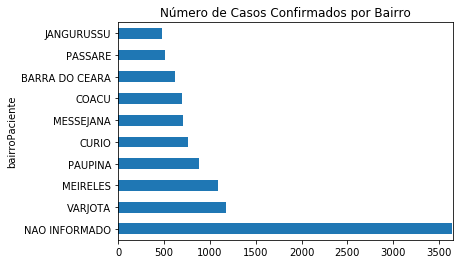

In [37]:
cases_covid_fortaleza_cleaned_positive.groupby('bairroPaciente').count()['codigoPaciente'].sort_values(ascending=False).head(10).plot(kind='barh', title='Número de Casos Confirmados por Bairro', xlim=(0,3650), legend=False)

In [38]:
cases_covid_fortaleza_cleaned_positive.pivot_table(index='bairroPaciente')

DataError: No numeric types to aggregate

In [39]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        lon = df['long'],
        lat = df['lat'],
        text = df['text'],
        mode = 'markers',
        marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo_scope='usa',
    )
fig.show()

In [40]:
bairros['THE_GEOM']

0      POLYGON ((-38.539819067859945 -3.7955371068432...
1      POLYGON ((-38.479334495231086 -3.7209126986722...
2      POLYGON ((-38.467647506862534 -3.7496832300526...
3      POLYGON ((-38.51716445420212 -3.76997951516616...
4      POLYGON ((-38.56887758295916 -3.70168935573553...
                             ...                        
114    POLYGON ((-38.44349599325527 -3.77470652979368...
115    POLYGON ((-38.58258539066931 -3.75321667692344...
116    POLYGON ((-38.564172987455045 -3.7355830497982...
117    POLYGON ((-38.51262420661683 -3.72401253371674...
118    POLYGON ((-38.56508202963311 -3.72717998720506...
Name: THE_GEOM, Length: 119, dtype: object

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [52]:
geo_bairros = gpd.read_file('https://dados.fortaleza.ce.gov.br/dataset/8d20208f-25d6-4ca3-b0bc-1b9b371bd062/resource/781b13ec-b479-4b97-a742-d3b7144672ee/download/limitebairro.json')

<Figure size 432x288 with 0 Axes>

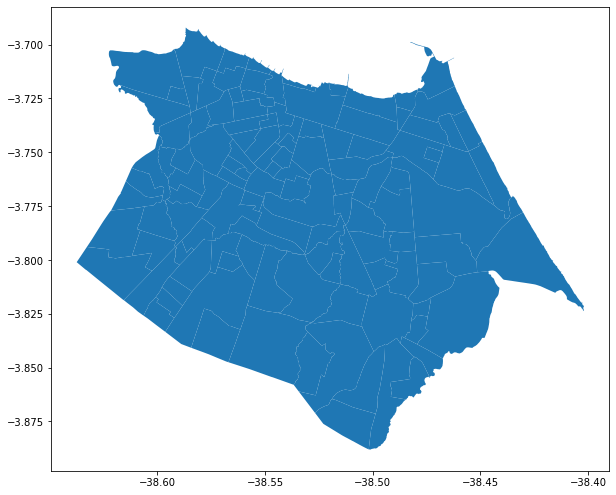

In [53]:
plt.figure()
geo_bairros.plot(figsize=(10,10))

In [54]:
casos_positivos = cases_covid_fortaleza_cleaned_positive.groupby('bairroPaciente').count()['codigoPaciente']

In [57]:
casos_positivos

bairroPaciente
AEROLANDIA           7
AEROPORTO           30
ALDEOTA              5
ALTO DA BALANCA     91
ALVARO WEYNE       271
                  ... 
VICENTE PINZON     318
VILA ELLERY         47
VILA PERY            2
VILA UNIAO         227
VILA VELHA         363
Name: codigoPaciente, Length: 118, dtype: int64

In [60]:
geo_bairros_casos_positivos = pd.merge(left=geo_bairros, right=casos_positivos, left_on='NOME', right_on='bairroPaciente')
geo_bairros_casos_positivos.rename(columns={'codigoPaciente': 'CASOS_POSITIVOS'}, inplace=True)
geo_bairros_casos_positivos

id  GID                NOME  \
0    Limite Bairro.fid-2be50750_153af4824fe_2d2e    6             PASSARE   
1    Limite Bairro.fid-2be50750_153af4824fe_2d2f   21       CAIS DO PORTO   
2    Limite Bairro.fid-2be50750_153af4824fe_2d30   22         CIDADE 2000   
3    Limite Bairro.fid-2be50750_153af4824fe_2d31   23     ALTO DA BALANCA   
4    Limite Bairro.fid-2be50750_153af4824fe_2d32   17      BARRA DO CEARA   
..                                           ...  ...                 ...   
112  Limite Bairro.fid-2be50750_153af4824fe_2da0  109  MANUEL DIAS BRANCO   
113  Limite Bairro.fid-2be50750_153af4824fe_2da1  110         DOM LUSTOSA   
114  Limite Bairro.fid-2be50750_153af4824fe_2da2  111        PARQUELANDIA   
115  Limite Bairro.fid-2be50750_153af4824fe_2da3  113    PRAIA DE IRACEMA   
116  Limite Bairro.fid-2be50750_153af4824fe_2da4  117         SAO GERARDO   

                                              geometry  CASOS_POSITIVOS  
0    POLYGON ((-38.53982 -3.79554, -38.53974 -3.795...              511  
1    POLYGON ((-38.47933 -3.72091, -38.47930 -3.720...               69  
2    POLYGON ((-38.46765 -3.74968, -38.46751 -3.749...               82  
3    POLYGON ((-38.51716 -3.76998, -38.51726 -3.769...               91  
4    POLYGON ((-38.56888 -3.70169, -38.56893 -3.701...              623  
..                                                 ...              ...  
112  POLYGON ((-38.44350 -3.77471, -38.44514 -3.773...               35  
113  POLYGON ((-38.58259 -3.75322, -38.58255 -3.753...               49  
114  POLYGON ((-38.56417 -3.73558, -38.56331 -3.735...                3  
115  POLYGON ((-38.51262 -3.72401, -38.51311 -3.723...               65  
116  POLYGON ((-38.56508 -3.72718, -38.56380 -3.726...              139  

[117 rows x 5 columns]

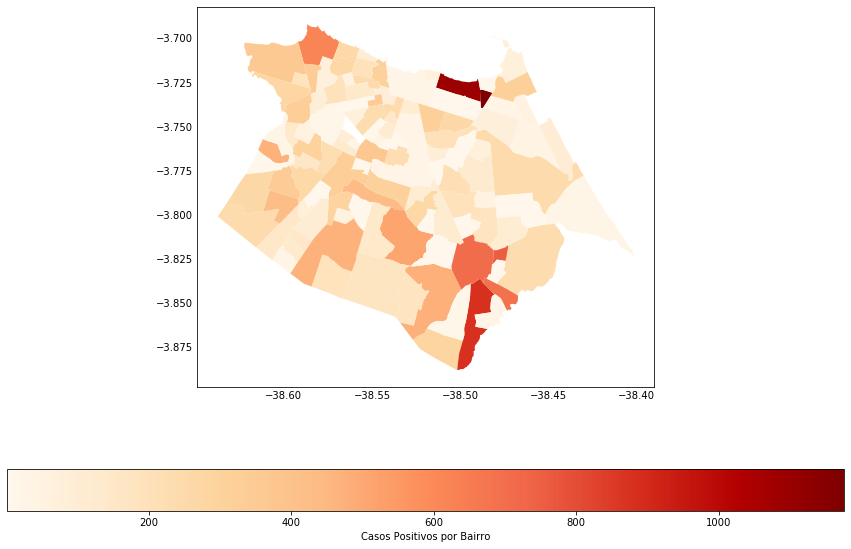

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.tick_params(axis='both', which='both',length=0)
geo_bairros_casos_positivos.plot(column='CASOS_POSITIVOS', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Casos Positivos por Bairro", 'orientation': "horizontal"})

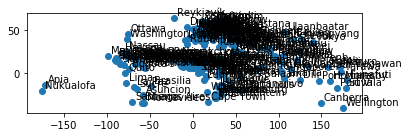

In [75]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

ax = cities.plot()

for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

In [111]:
geo_bairros_casos_positivos_crs = geo_bairros_casos_positivos.to_crs(epsg=3857)

In [79]:
import contextily as ctx

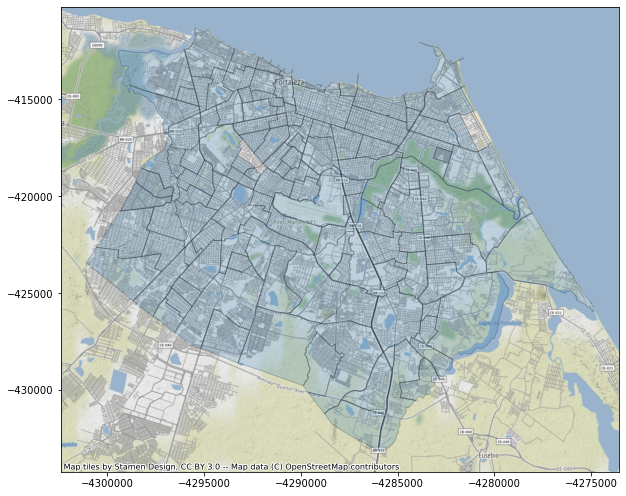

In [112]:
ax = geo_bairros_casos_positivos_crs.plot(figsize=(10, 10), alpha=0.2, edgecolor='k')
ctx.add_basemap(ax, zoom=13)

In [99]:
import folium

In [113]:
casos_positivos

bairroPaciente
AEROLANDIA           7
AEROPORTO           30
ALDEOTA              5
ALTO DA BALANCA     91
ALVARO WEYNE       271
                  ... 
VICENTE PINZON     318
VILA ELLERY         47
VILA PERY            2
VILA UNIAO         227
VILA VELHA         363
Name: codigoPaciente, Length: 118, dtype: int64

In [114]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = 'https://dados.fortaleza.ce.gov.br/dataset/8d20208f-25d6-4ca3-b0bc-1b9b371bd062/resource/781b13ec-b479-4b97-a742-d3b7144672ee/download/limitebairro.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[-3.7899266, -38.5889868], zoom_start=12)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=casos_positivos,
    columns=['codigoPaciente'],
    key_on='feature.properties.NOME',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m